In [1]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd
import seaborn as sn
import numpy as np

2023-07-07 15:13:47.854530: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-07 15:13:47.936408: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-07 15:13:47.939667: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-07 15:13:52.813912: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
classifier_output = pd.DataFrame(columns = ['file','dominant_gender', 'Man', 'Woman', 
                                 'dominant_race', 'white', 'latino hispanic', 'asian', 
                                 'black', 'middle eastern', 'indian'])

In [7]:
cropped_image_save_path = 'runs/cropped/'
label_path = 'testset_labeled.csv'

results = {}
idx = 0
for file in os.listdir(cropped_image_save_path):
    objs = DeepFace.analyze(img_path = cropped_image_save_path + "/" + file, 
            actions = ['gender', 'race'], enforce_detection = False
    )
    print(objs)
    results[file] = [objs[0]['dominant_gender'], objs[0]['gender'], objs[0]['dominant_race'], objs[0]['race']]
    
    row = pd.DataFrame({"file": file,
                        "dominant_gender": [objs[0]['dominant_gender']], 
                        "Man" : [objs[0]['gender']['Man']],
                        "Woman" : [objs[0]['gender']['Woman']],
                        "dominant_race" : [objs[0]['dominant_race']],
                        "white": [objs[0]['race']['white']],
                        "latino hispanic": [objs[0]['race']['latino hispanic']],
                        "asian": [objs[0]['race']['asian']],
                        "black": [objs[0]['race']['black']],
                        "middle eastern": [objs[0]['race']['middle eastern']],
                        "indian": [objs[0]['race']['indian']]},                        
                        index = [idx])    
    classifier_output = pd.concat([classifier_output, row])
    idx += 1

Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.13it/s]


[{'gender': {'Woman': 72.11109399795532, 'Man': 27.88890302181244}, 'dominant_gender': 'Woman', 'region': {'x': 0, 'y': 0, 'w': 49, 'h': 65}, 'race': {'asian': 99.6640682220459, 'indian': 0.1015164190903306, 'black': 0.00562183849979192, 'white': 0.049815227976068854, 'middle eastern': 0.0002597278808025294, 'latino hispanic': 0.17871023155748844}, 'dominant_race': 'asian'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.66it/s]


[{'gender': {'Woman': 0.00024239079721155576, 'Man': 99.9997615814209}, 'dominant_gender': 'Man', 'region': {'x': 0, 'y': 0, 'w': 83, 'h': 116}, 'race': {'asian': 1.3176423405041154e-06, 'indian': 3.594932566077205e-06, 'black': 2.4643646926498473e-08, 'white': 99.92961287078934, 'middle eastern': 0.03204007998627156, 'latino hispanic': 0.03834161553891692}, 'dominant_race': 'white'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.20it/s]


[{'gender': {'Woman': 99.02905821800232, 'Man': 0.9709369391202927}, 'dominant_gender': 'Woman', 'region': {'x': 0, 'y': 0, 'w': 26, 'h': 60}, 'race': {'asian': 0.0003998112333647441, 'indian': 0.003549501343513839, 'black': 7.151770660129841e-05, 'white': 96.76116704940796, 'middle eastern': 2.156705968081951, 'latino hispanic': 1.0781077668070793}, 'dominant_race': 'white'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.48it/s]


[{'gender': {'Woman': 99.38733577728271, 'Man': 0.6126641761511564}, 'dominant_gender': 'Woman', 'region': {'x': 0, 'y': 0, 'w': 73, 'h': 97}, 'race': {'asian': 99.88328814506531, 'indian': 0.09431337821297348, 'black': 8.565429254758783e-07, 'white': 0.014179361460264772, 'middle eastern': 4.108805740088428e-07, 'latino hispanic': 0.008220986637752503}, 'dominant_race': 'asian'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.78it/s]


[{'gender': {'Woman': 81.81695938110352, 'Man': 18.183036148548126}, 'dominant_gender': 'Woman', 'region': {'x': 0, 'y': 0, 'w': 43, 'h': 55}, 'race': {'asian': 0.6674573291093111, 'indian': 1.321374624967575, 'black': 0.1963794231414795, 'white': 56.46687150001526, 'middle eastern': 16.68243110179901, 'latino hispanic': 24.66548979282379}, 'dominant_race': 'white'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.74it/s]


[{'gender': {'Woman': 0.0002745229721767828, 'Man': 99.99972581863403}, 'dominant_gender': 'Man', 'region': {'x': 0, 'y': 0, 'w': 64, 'h': 86}, 'race': {'asian': 6.8336255848407745, 'indian': 15.98183661699295, 'black': 21.0902601480484, 'white': 14.168095588684082, 'middle eastern': 12.174128741025925, 'latino hispanic': 29.752051830291748}, 'dominant_race': 'latino hispanic'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.82it/s]


[{'gender': {'Woman': 99.73264932632446, 'Man': 0.2673499286174774}, 'dominant_gender': 'Woman', 'region': {'x': 0, 'y': 0, 'w': 41, 'h': 57}, 'race': {'asian': 22.28990378500178, 'indian': 22.051613384292914, 'black': 6.9575204601859495, 'white': 6.049864390508605, 'middle eastern': 3.9075131526573714, 'latino hispanic': 38.74358370976642}, 'dominant_race': 'latino hispanic'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.77it/s]


[{'gender': {'Woman': 85.92525720596313, 'Man': 14.074739813804626}, 'dominant_gender': 'Woman', 'region': {'x': 0, 'y': 0, 'w': 67, 'h': 88}, 'race': {'asian': 0.05204501794651151, 'indian': 0.037951223202981055, 'black': 0.006188871338963509, 'white': 92.04066395759583, 'middle eastern': 3.89220267534256, 'latino hispanic': 3.9709534496068954}, 'dominant_race': 'white'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.96it/s]


[{'gender': {'Woman': 81.74793720245361, 'Man': 18.25205832719803}, 'dominant_gender': 'Woman', 'region': {'x': 0, 'y': 0, 'w': 40, 'h': 52}, 'race': {'asian': 0.01701199362287298, 'indian': 0.1626942539587617, 'black': 0.010744054452516139, 'white': 78.77907156944275, 'middle eastern': 17.01323240995407, 'latino hispanic': 4.017246514558792}, 'dominant_race': 'white'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.86it/s]


[{'gender': {'Woman': 97.44025468826294, 'Man': 2.5597412139177322}, 'dominant_gender': 'Woman', 'region': {'x': 0, 'y': 0, 'w': 68, 'h': 85}, 'race': {'asian': 4.912643134593964, 'indian': 18.41636151075363, 'black': 2.9634982347488403, 'white': 17.785927653312683, 'middle eastern': 14.895868301391602, 'latino hispanic': 41.02570414543152}, 'dominant_race': 'latino hispanic'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.78it/s]


[{'gender': {'Woman': 0.169796880800277, 'Man': 99.83019828796387}, 'dominant_gender': 'Man', 'region': {'x': 0, 'y': 0, 'w': 46, 'h': 62}, 'race': {'asian': 91.74547293836201, 'indian': 1.3508873312607608, 'black': 0.02990420551249915, 'white': 1.7914585496236624, 'middle eastern': 0.01979507124398917, 'latino hispanic': 5.0624785497810185}, 'dominant_race': 'asian'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.77it/s]


[{'gender': {'Woman': 99.99778270721436, 'Man': 0.0022153009922476485}, 'dominant_gender': 'Woman', 'region': {'x': 0, 'y': 0, 'w': 64, 'h': 89}, 'race': {'asian': 5.833929032087326, 'indian': 8.132417500019073, 'black': 3.904884308576584, 'white': 29.546597599983215, 'middle eastern': 20.769909024238586, 'latino hispanic': 31.812259554862976}, 'dominant_race': 'latino hispanic'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.83it/s]


[{'gender': {'Woman': 11.623664945363998, 'Man': 88.3763313293457}, 'dominant_gender': 'Man', 'region': {'x': 0, 'y': 0, 'w': 122, 'h': 303}, 'race': {'asian': 33.02685517232747, 'indian': 2.0426881785802946, 'black': 0.35563448701110406, 'white': 41.57198021244885, 'middle eastern': 9.031810404766226, 'latino hispanic': 13.971036015214683}, 'dominant_race': 'white'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.54it/s]


[{'gender': {'Woman': 0.04158610827289522, 'Man': 99.95841383934021}, 'dominant_gender': 'Man', 'region': {'x': 0, 'y': 0, 'w': 43, 'h': 49}, 'race': {'asian': 0.7473340723663568, 'indian': 1.9129607826471329, 'black': 0.23465447593480349, 'white': 50.84317326545715, 'middle eastern': 31.851017475128174, 'latino hispanic': 14.41086232662201}, 'dominant_race': 'white'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.48it/s]


[{'gender': {'Woman': 0.04411483823787421, 'Man': 99.95588660240173}, 'dominant_gender': 'Man', 'region': {'x': 0, 'y': 0, 'w': 69, 'h': 95}, 'race': {'asian': 13.298939168453217, 'indian': 12.023553252220154, 'black': 17.272654175758362, 'white': 12.466634064912796, 'middle eastern': 13.346926867961884, 'latino hispanic': 31.591293215751648}, 'dominant_race': 'latino hispanic'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.69it/s]


[{'gender': {'Woman': 0.1648730249144137, 'Man': 99.83513355255127}, 'dominant_gender': 'Man', 'region': {'x': 0, 'y': 0, 'w': 49, 'h': 56}, 'race': {'asian': 7.1424514055252075, 'indian': 12.975737452507019, 'black': 2.6350175961852074, 'white': 22.89019227027893, 'middle eastern': 27.42455303668976, 'latino hispanic': 26.932048797607422}, 'dominant_race': 'middle eastern'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.49it/s]


[{'gender': {'Woman': 0.8347528055310249, 'Man': 99.16524291038513}, 'dominant_gender': 'Man', 'region': {'x': 0, 'y': 0, 'w': 48, 'h': 55}, 'race': {'asian': 18.763715028762817, 'indian': 7.83676877617836, 'black': 12.562979757785797, 'white': 21.476779878139496, 'middle eastern': 13.933275640010834, 'latino hispanic': 25.426477193832397}, 'dominant_race': 'latino hispanic'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.65it/s]


[{'gender': {'Woman': 99.99785423278809, 'Man': 0.0021483187083504163}, 'dominant_gender': 'Woman', 'region': {'x': 0, 'y': 0, 'w': 66, 'h': 89}, 'race': {'asian': 0.014769228589935814, 'indian': 1.567007694662076, 'black': 0.0014916150555604728, 'white': 19.06617844499221, 'middle eastern': 71.18786401676321, 'latino hispanic': 8.162691930692906}, 'dominant_race': 'middle eastern'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.74it/s]


[{'gender': {'Woman': 0.007944033131934702, 'Man': 99.99206066131592}, 'dominant_gender': 'Man', 'region': {'x': 0, 'y': 0, 'w': 91, 'h': 128}, 'race': {'asian': 9.852435558624681e-06, 'indian': 0.00027961222108448686, 'black': 6.5319908800019146e-06, 'white': 99.29801830076953, 'middle eastern': 0.620144904238593, 'latino hispanic': 0.08153987192818558}, 'dominant_race': 'white'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.44it/s]


[{'gender': {'Woman': 0.13436523731797934, 'Man': 99.86562728881836}, 'dominant_gender': 'Man', 'region': {'x': 0, 'y': 0, 'w': 62, 'h': 81}, 'race': {'asian': 0.00024286106797054716, 'indian': 0.0016856372704388846, 'black': 3.7685238167360206e-05, 'white': 97.77213957641845, 'middle eastern': 1.3685857176976541, 'latino hispanic': 0.8573032824929616}, 'dominant_race': 'white'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.27it/s]


[{'gender': {'Woman': 36.15536391735077, 'Man': 63.84463310241699}, 'dominant_gender': 'Man', 'region': {'x': 0, 'y': 0, 'w': 47, 'h': 59}, 'race': {'asian': 85.23307354647359, 'indian': 2.4953476709334654, 'black': 0.636543045508447, 'white': 0.5066128749616667, 'middle eastern': 0.044652289694870395, 'latino hispanic': 11.083772694097322}, 'dominant_race': 'asian'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.72it/s]


[{'gender': {'Woman': 3.374394029378891, 'Man': 96.62560820579529}, 'dominant_gender': 'Man', 'region': {'x': 0, 'y': 0, 'w': 76, 'h': 103}, 'race': {'asian': 13.98942619562149, 'indian': 13.167791068553925, 'black': 5.051463097333908, 'white': 12.397313863039017, 'middle eastern': 7.494828850030899, 'latino hispanic': 47.89917767047882}, 'dominant_race': 'latino hispanic'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.82it/s]


[{'gender': {'Woman': 99.63520765304565, 'Man': 0.36478701513260603}, 'dominant_gender': 'Woman', 'region': {'x': 0, 'y': 0, 'w': 56, 'h': 77}, 'race': {'asian': 12.484988570213318, 'indian': 9.195703268051147, 'black': 2.6196282356977463, 'white': 15.283019840717316, 'middle eastern': 7.942670583724976, 'latino hispanic': 52.47398614883423}, 'dominant_race': 'latino hispanic'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.91it/s]


[{'gender': {'Woman': 0.24422446731477976, 'Man': 99.75577592849731}, 'dominant_gender': 'Man', 'region': {'x': 0, 'y': 0, 'w': 31, 'h': 42}, 'race': {'asian': 3.8112622399931e-08, 'indian': 2.3218473262848669e-07, 'black': 3.619883908670879e-10, 'white': 99.97754693298972, 'middle eastern': 0.01091804603579464, 'latino hispanic': 0.011527928371844038}, 'dominant_race': 'white'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.94it/s]


[{'gender': {'Woman': 99.99803304672241, 'Man': 0.0019645949578261934}, 'dominant_gender': 'Woman', 'region': {'x': 0, 'y': 0, 'w': 211, 'h': 310}, 'race': {'asian': 5.190708860754967, 'indian': 6.991630047559738, 'black': 1.268711406737566, 'white': 28.668886423110962, 'middle eastern': 22.313933074474335, 'latino hispanic': 35.56613326072693}, 'dominant_race': 'latino hispanic'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.78it/s]


[{'gender': {'Woman': 8.941741498347255e-05, 'Man': 99.99990463256836}, 'dominant_gender': 'Man', 'region': {'x': 0, 'y': 0, 'w': 57, 'h': 84}, 'race': {'asian': 4.701380676323478e-08, 'indian': 9.922316360433729e-06, 'black': 4.245713409112287e-09, 'white': 98.43671312550981, 'middle eastern': 1.41314434860017, 'latino hispanic': 0.15012975512845844}, 'dominant_race': 'white'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.75it/s]


[{'gender': {'Woman': 12.26102039217949, 'Man': 87.73897886276245}, 'dominant_gender': 'Man', 'region': {'x': 0, 'y': 0, 'w': 52, 'h': 73}, 'race': {'asian': 0.0002683039745833061, 'indian': 0.0006190752800253584, 'black': 1.331948579189735e-05, 'white': 99.06603705095803, 'middle eastern': 0.4332937249340147, 'latino hispanic': 0.4997626282557692}, 'dominant_race': 'white'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.71it/s]


[{'gender': {'Woman': 99.99997615814209, 'Man': 2.297289398711655e-05}, 'dominant_gender': 'Woman', 'region': {'x': 0, 'y': 0, 'w': 72, 'h': 105}, 'race': {'asian': 0.7261517890484207, 'indian': 0.5117606211012972, 'black': 0.07302306329223891, 'white': 68.88502054721239, 'middle eastern': 18.00654339829346, 'latino hispanic': 11.797507065386002}, 'dominant_race': 'white'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.51it/s]


[{'gender': {'Woman': 0.001676888314250391, 'Man': 99.99831914901733}, 'dominant_gender': 'Man', 'region': {'x': 0, 'y': 0, 'w': 36, 'h': 49}, 'race': {'asian': 3.5379726925910404e-08, 'indian': 3.353049464749347e-05, 'black': 99.99996423721313, 'white': 2.631037922251611e-09, 'middle eastern': 4.904375169867414e-09, 'latino hispanic': 8.439942078553031e-07}, 'dominant_race': 'black'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.61it/s]


[{'gender': {'Woman': 0.008719007018953562, 'Man': 99.99128580093384}, 'dominant_gender': 'Man', 'region': {'x': 0, 'y': 0, 'w': 74, 'h': 104}, 'race': {'asian': 10.297654569149017, 'indian': 21.34930193424225, 'black': 14.518973231315613, 'white': 9.649302065372467, 'middle eastern': 9.667038917541504, 'latino hispanic': 34.51772928237915}, 'dominant_race': 'latino hispanic'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.49it/s]


[{'gender': {'Woman': 99.99881982803345, 'Man': 0.0011811106560344342}, 'dominant_gender': 'Woman', 'region': {'x': 0, 'y': 0, 'w': 44, 'h': 58}, 'race': {'asian': 38.14559876918793, 'indian': 13.136686384677887, 'black': 34.74293649196625, 'white': 0.9084870107471943, 'middle eastern': 0.5669277627021074, 'latino hispanic': 12.499356269836426}, 'dominant_race': 'asian'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.31it/s]


[{'gender': {'Woman': 99.9998688697815, 'Man': 0.00013613499731945922}, 'dominant_gender': 'Woman', 'region': {'x': 0, 'y': 0, 'w': 35, 'h': 44}, 'race': {'asian': 4.0800367173687846e-05, 'indian': 0.0007155926596169593, 'black': 1.2018972483929247e-06, 'white': 98.5365092754364, 'middle eastern': 1.140652596950531, 'latino hispanic': 0.3220847574993968}, 'dominant_race': 'white'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.23it/s]


[{'gender': {'Woman': 99.98713731765747, 'Man': 0.01285631733480841}, 'dominant_gender': 'Woman', 'region': {'x': 0, 'y': 0, 'w': 48, 'h': 62}, 'race': {'asian': 5.425905555966892e-05, 'indian': 4.2592301241484165e-06, 'black': 3.839151219153791e-08, 'white': 99.8789131641388, 'middle eastern': 0.04565614799503237, 'latino hispanic': 0.07537181372754276}, 'dominant_race': 'white'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.49it/s]


[{'gender': {'Woman': 0.0053987449064152315, 'Man': 99.99459981918335}, 'dominant_gender': 'Man', 'region': {'x': 0, 'y': 0, 'w': 74, 'h': 95}, 'race': {'asian': 0.1570667535024281, 'indian': 17.82343175131896, 'black': 0.7515192532963451, 'white': 12.855134862049239, 'middle eastern': 59.46980005862712, 'latino hispanic': 8.94304034792896}, 'dominant_race': 'middle eastern'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.69it/s]


[{'gender': {'Woman': 0.6371916271746159, 'Man': 99.36281442642212}, 'dominant_gender': 'Man', 'region': {'x': 0, 'y': 0, 'w': 47, 'h': 58}, 'race': {'asian': 1.2486272460421333e-06, 'indian': 1.517200942657837e-06, 'black': 3.390880284892539e-09, 'white': 99.94957447052002, 'middle eastern': 0.03981290792580694, 'latino hispanic': 0.010618571832310408}, 'dominant_race': 'white'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.53it/s]


[{'gender': {'Woman': 6.7467838525772095, 'Man': 93.25321912765503}, 'dominant_gender': 'Man', 'region': {'x': 0, 'y': 0, 'w': 44, 'h': 56}, 'race': {'asian': 0.021667491819243878, 'indian': 0.015410879859700799, 'black': 0.0012802090168406721, 'white': 96.66904211044312, 'middle eastern': 1.9233951345086098, 'latino hispanic': 1.3691998086869717}, 'dominant_race': 'white'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.77it/s]


[{'gender': {'Woman': 3.3737175166606903, 'Man': 96.62628173828125}, 'dominant_gender': 'Man', 'region': {'x': 0, 'y': 0, 'w': 44, 'h': 55}, 'race': {'asian': 8.059109218014385, 'indian': 8.60045952802414, 'black': 2.063761525006476, 'white': 31.89361177606723, 'middle eastern': 27.95587813328244, 'latino hispanic': 21.427180937192553}, 'dominant_race': 'white'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.70it/s]


[{'gender': {'Woman': 89.41335678100586, 'Man': 10.586642473936081}, 'dominant_gender': 'Woman', 'region': {'x': 0, 'y': 0, 'w': 43, 'h': 53}, 'race': {'asian': 2.919287793338299, 'indian': 2.0343180745840073, 'black': 0.20894280169159174, 'white': 44.43807303905487, 'middle eastern': 13.965392112731934, 'latino hispanic': 36.433982849121094}, 'dominant_race': 'white'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.77it/s]


[{'gender': {'Woman': 14.674851298332214, 'Man': 85.32514572143555}, 'dominant_gender': 'Man', 'region': {'x': 0, 'y': 0, 'w': 42, 'h': 54}, 'race': {'asian': 99.24654960632324, 'indian': 0.035492132883518934, 'black': 0.0009901666089717764, 'white': 0.35106632858514786, 'middle eastern': 0.0032651561923557892, 'latino hispanic': 0.3626355202868581}, 'dominant_race': 'asian'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.55it/s]


[{'gender': {'Woman': 0.001251197772944579, 'Man': 99.99874830245972}, 'dominant_gender': 'Man', 'region': {'x': 0, 'y': 0, 'w': 72, 'h': 110}, 'race': {'asian': 0.0018960593947483203, 'indian': 0.03702724202118164, 'black': 0.0011210973325937906, 'white': 91.0777221825454, 'middle eastern': 6.053585955073124, 'latino hispanic': 2.828646859091895}, 'dominant_race': 'white'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.98it/s]


[{'gender': {'Woman': 99.9998927116394, 'Man': 0.00010376617183283088}, 'dominant_gender': 'Woman', 'region': {'x': 0, 'y': 0, 'w': 39, 'h': 53}, 'race': {'asian': 0.004343763794167899, 'indian': 0.0010918060070252977, 'black': 2.050526290986454e-05, 'white': 98.22929501533508, 'middle eastern': 0.5563855171203613, 'latino hispanic': 1.2088662013411522}, 'dominant_race': 'white'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.92it/s]


[{'gender': {'Woman': 0.059404579224064946, 'Man': 99.94059801101685}, 'dominant_gender': 'Man', 'region': {'x': 0, 'y': 0, 'w': 34, 'h': 46}, 'race': {'asian': 0.012122654152335599, 'indian': 0.00843342422740534, 'black': 0.0006880301953060552, 'white': 95.7580029964447, 'middle eastern': 2.0842911675572395, 'latino hispanic': 2.136468328535557}, 'dominant_race': 'white'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.69it/s]


[{'gender': {'Woman': 0.008477416849927977, 'Man': 99.99152421951294}, 'dominant_gender': 'Man', 'region': {'x': 0, 'y': 0, 'w': 43, 'h': 54}, 'race': {'asian': 0.00025322810870420653, 'indian': 0.018558447482064366, 'black': 0.0001832272232604737, 'white': 88.51052522659302, 'middle eastern': 10.51461175084114, 'latino hispanic': 0.9558694437146187}, 'dominant_race': 'white'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.70it/s]


[{'gender': {'Woman': 99.99946355819702, 'Man': 0.0005317318482411793}, 'dominant_gender': 'Woman', 'region': {'x': 0, 'y': 0, 'w': 212, 'h': 369}, 'race': {'asian': 2.6602832600474358, 'indian': 2.730405144393444, 'black': 0.6868500728160143, 'white': 41.509124636650085, 'middle eastern': 17.45220422744751, 'latino hispanic': 34.96113121509552}, 'dominant_race': 'white'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.90it/s]


[{'gender': {'Woman': 0.03630040737334639, 'Man': 99.96370077133179}, 'dominant_gender': 'Man', 'region': {'x': 0, 'y': 0, 'w': 63, 'h': 80}, 'race': {'asian': 1.5272512258763388e-13, 'indian': 8.157999625770136e-13, 'black': 100.0, 'white': 1.609940252962894e-19, 'middle eastern': 3.8235241205481695e-18, 'latino hispanic': 4.351862582997095e-13}, 'dominant_race': 'black'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.61it/s]


[{'gender': {'Woman': 0.2553133759647608, 'Man': 99.74468946456909}, 'dominant_gender': 'Man', 'region': {'x': 0, 'y': 0, 'w': 67, 'h': 85}, 'race': {'asian': 85.34830808639526, 'indian': 5.75285367667675, 'black': 2.6148254051804543, 'white': 0.520384544506669, 'middle eastern': 0.0727756239939481, 'latino hispanic': 5.690847709774971}, 'dominant_race': 'asian'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.90it/s]


[{'gender': {'Woman': 96.98660373687744, 'Man': 3.013395331799984}, 'dominant_gender': 'Woman', 'region': {'x': 0, 'y': 0, 'w': 55, 'h': 72}, 'race': {'asian': 5.447032302618027, 'indian': 4.557238891720772, 'black': 1.5485310927033424, 'white': 38.71338367462158, 'middle eastern': 19.740712642669678, 'latino hispanic': 29.993104934692383}, 'dominant_race': 'white'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.56it/s]


[{'gender': {'Woman': 12.646360695362091, 'Man': 87.35363483428955}, 'dominant_gender': 'Man', 'region': {'x': 0, 'y': 0, 'w': 51, 'h': 65}, 'race': {'asian': 1.7306676924899733e-08, 'indian': 1.4349517407641343e-08, 'black': 4.1214392467424366e-11, 'white': 99.98787641525269, 'middle eastern': 0.0037937581510050222, 'latino hispanic': 0.008334690210176632}, 'dominant_race': 'white'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.54it/s]


[{'gender': {'Woman': 0.3056218149140477, 'Man': 99.69437718391418}, 'dominant_gender': 'Man', 'region': {'x': 0, 'y': 0, 'w': 71, 'h': 104}, 'race': {'asian': 0.0016935642634052783, 'indian': 0.1734046032652259, 'black': 0.0007437806289090076, 'white': 49.442893266677856, 'middle eastern': 45.01863121986389, 'latino hispanic': 5.362631380558014}, 'dominant_race': 'white'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.54it/s]


[{'gender': {'Woman': 99.99920129776001, 'Man': 0.0008044709829846397}, 'dominant_gender': 'Woman', 'region': {'x': 0, 'y': 0, 'w': 77, 'h': 103}, 'race': {'asian': 0.226873233020095, 'indian': 0.5748658194978022, 'black': 0.028960026061985025, 'white': 47.8679475626883, 'middle eastern': 10.121085956226105, 'latino hispanic': 41.180269858869295}, 'dominant_race': 'white'}]


Action: race: 100%|███████████████████████████████| 2/2 [00:00<00:00,  4.45it/s]

[{'gender': {'Woman': 97.21161723136902, 'Man': 2.78838574886322}, 'dominant_gender': 'Woman', 'region': {'x': 0, 'y': 0, 'w': 82, 'h': 109}, 'race': {'asian': 0.00659055876894854, 'indian': 0.006247240526136011, 'black': 0.0002317755615877104, 'white': 96.71387076377869, 'middle eastern': 1.68257225304842, 'latino hispanic': 1.5904847532510757}, 'dominant_race': 'white'}]


In [11]:
myKeys = list(results.keys())
myKeys.sort()
# cnt = 0
# for i in myKeys:
#     print("(" + str(cnt) + "): " + i + ": " + results[i][0] + " " + results[i][1] +"\n")
#     cnt += 1
# sorted_dict = {i: results[i] for i in myKeys}

In [13]:
classifier_output = classifier_output.sort_values(by = 'file')
classifier_output.to_csv("testset_classifier_output.csv", index = False)

In [14]:
labels_df = pd.read_csv('testset_labeled.csv')
lines = len(labels_df['file'])

In [15]:
groundtruth_dict = {}
for i in range(lines):
    filename = labels_df['file'][i]
    gender_label = labels_df['gender'][i]
    race_label = labels_df['race'][i]
    
    groundtruth_dict[filename] = [gender_label, race_label]
    

In [16]:
groundtruth_keys = list(groundtruth_dict.keys())
groundtruth_keys.sort()
# cnt = 0
# for i in groundtruth_keys:
#     print("(" + str(cnt) + "): " + i + ": " + groundtruth_dict[i][0] + " " + groundtruth_dict[i][1] +"\n")
#     cnt += 1

In [17]:
files = 0
correctGender = 0
correctRace = 0

incorrectGender = {}
incorrectRace = {}
for filename in myKeys:
    files += 1
    if groundtruth_dict[filename][0] == results[filename][0]:
        correctGender += 1
    else: 
        incorrectGender[filename] = ["GT: " + groundtruth_dict[filename][0] + ", Predicted: " + results[filename][0]]
        
    if groundtruth_dict[filename][1] == results[filename][2]:
        correctRace += 1
    else: 
        incorrectRace[filename] = ["GT: " + groundtruth_dict[filename][1] + ", Predicted: " + results[filename][2] + ", Race Confidence: " + str(results[filename][3])]

print(str(correctGender/files) + " " + str(correctRace/files))

0.9019607843137255 0.6862745098039216


In [18]:
for file in incorrectGender.keys():
    print(file + ", " + str(incorrectGender[file]))

doctors_1.jpg, ['GT: Woman, Predicted: Man']
doctors_femalegroup1_2.jpg, ['GT: Woman, Predicted: Man']
grouptest2_2.jpg, ['GT: Woman, Predicted: Man']
grouptest3_0.jpg, ['GT: Woman, Predicted: Man']
teachers2_2.jpg, ['GT: Woman, Predicted: Man']


In [19]:
for file in incorrectRace.keys():
    print(file + ", " + str(incorrectRace[file]) + "\n")

doctors_4.jpg, ["GT: black, Predicted: asian, Race Confidence: {'asian': 38.14559876918793, 'indian': 13.136686384677887, 'black': 34.74293649196625, 'white': 0.9084870107471943, 'middle eastern': 0.5669277627021074, 'latino hispanic': 12.499356269836426}"]

doctors_femalegroup1_1.jpg, ["GT: white, Predicted: latino hispanic, Race Confidence: {'asian': 5.190708860754967, 'indian': 6.991630047559738, 'black': 1.268711406737566, 'white': 28.668886423110962, 'middle eastern': 22.313933074474335, 'latino hispanic': 35.56613326072693}"]

doctors_femalegroup1_2.jpg, ["GT: latino hispanic, Predicted: white, Race Confidence: {'asian': 33.02685517232747, 'indian': 2.0426881785802946, 'black': 0.35563448701110406, 'white': 41.57198021244885, 'middle eastern': 9.031810404766226, 'latino hispanic': 13.971036015214683}"]

doctors_malegroup1_0.jpg, ["GT: white, Predicted: middle eastern, Race Confidence: {'asian': 0.1570667535024281, 'indian': 17.82343175131896, 'black': 0.7515192532963451, 'white':

In [21]:
# set up confusion matrices
gender_confusion = np.zeros([2, 2])
gender_confidence_confusion = np.zeros([2, 2])

num_races = len(labels_df['race'].unique())
race_confusion = np.zeros([num_races, num_races])
race_confidence_confusion = np.zeros([num_races, num_races])

# set up dictionaries to convert race to index
allraces = labels_df['race'].unique()
race_dict = {}
for i in range(num_races):
    race_dict[allraces[i]] = i
    
gender_dict = {"Man": 1, "Woman": 0}

In [22]:
for filename in myKeys:
    trueGender = groundtruth_dict[filename][0]
    trueRace = groundtruth_dict[filename][1]
    predGender = results[filename][0]
    predRace = results[filename][2]
    
    # update classification confusion matrices
    gender_confusion[gender_dict[trueGender]][gender_dict[predGender]] += 1
    race_confusion[race_dict[trueRace]][race_dict[predRace]] += 1

In [23]:
for i in range(gender_confusion.shape[0]):
    gender_confusion[i, :] /= np.sum(gender_confusion[i, :])
    
for i in range(race_confusion.shape[0]):
    race_confusion[i, :] /= np.sum(race_confusion[i, :])

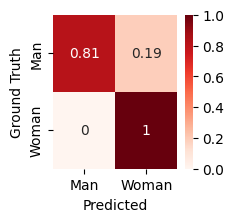

In [24]:
df_gender_confusion = pd.DataFrame(gender_confusion, index = ["Man", "Woman"],
              columns = ["Man", "Woman"])
plt.figure(figsize = (2,2))
gmap1 = sn.heatmap(df_gender_confusion, annot=True,cmap="Reds")
gmap1 = gmap1.set(xlabel='Predicted', ylabel='Ground Truth')

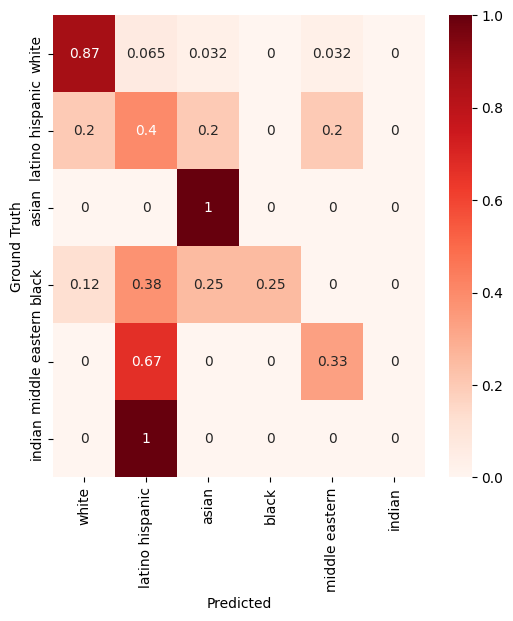

In [25]:
df_race_confusion = pd.DataFrame(race_confusion, index = allraces,
              columns = [allraces])
plt.figure(figsize = (6,6))
plt.xlabel(xlabel = "Predicted")
plt.ylabel(ylabel = "Ground Truth")
rmap1 = sn.heatmap(df_race_confusion, annot=True,cmap="Reds")
rmap1 = rmap1.set(xlabel='Predicted', ylabel='Ground Truth')

In [26]:
for filename in myKeys:
    trueGender = groundtruth_dict[filename][0]
    trueRace = groundtruth_dict[filename][1]
    predGender = results[filename][0]
    predRace = results[filename][2]
    
    # update confidence confusion matrices
    
    # gender update
    for possibleGender, genderConfidence in results[filename][1].items():
        gender_confidence_confusion[gender_dict[trueGender]][gender_dict[possibleGender]] += genderConfidence
    for possibleRace, raceConfidence in results[filename][3].items():
        race_confidence_confusion[race_dict[trueRace]][race_dict[possibleRace]] += raceConfidence

In [27]:
for i in range(gender_confidence_confusion.shape[0]):
    gender_confidence_confusion[i, :] /= np.sum(gender_confidence_confusion[i, :])
    
for i in range(race_confidence_confusion.shape[0]):
    race_confidence_confusion[i, :] /= np.sum(race_confidence_confusion[i, :])

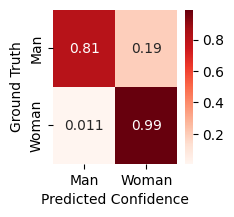

In [28]:
df_gender_confidence_confusion = pd.DataFrame(gender_confidence_confusion, index = ["Man", "Woman"],
              columns = ["Man", "Woman"])
plt.figure(figsize = (2,2))
gmap2 = sn.heatmap(df_gender_confidence_confusion, annot=True,cmap="Reds")
gmap2 = gmap2.set(xlabel='Predicted Confidence', ylabel='Ground Truth')

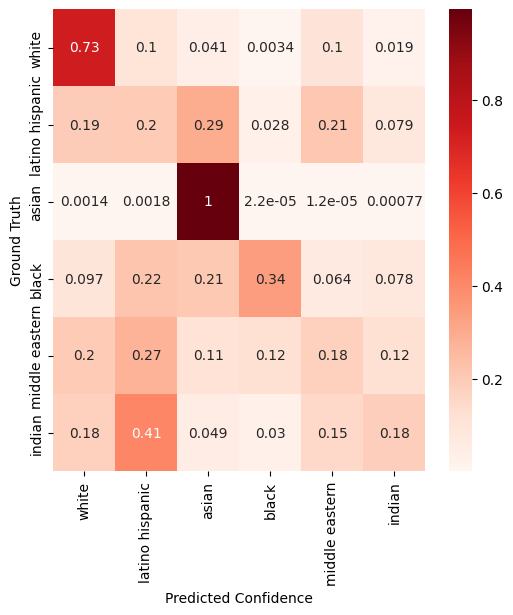

In [29]:
df_race_confidence_confusion = pd.DataFrame(race_confidence_confusion, index = allraces,
              columns = allraces)
plt.figure(figsize = (num_races, num_races))
rmap2 = sn.heatmap(df_race_confidence_confusion, annot=True,cmap="Reds")
rmap2 = rmap2.set(xlabel='Predicted Confidence', ylabel='Ground Truth')